In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the data into pandas dataframe
df = pd.read_csv("climate_action_data.csv")

In [2]:
#Data inspection
print("DATA STRUCTURE")
df.info()

DATA STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [3]:
#Checking for missing values
print("CHECKING FOR MISSING VALUES")
print(df.isnull().sum())

CHECKING FOR MISSING VALUES
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [4]:
#Checking and removing duplicate values
df.drop_duplicates(keep = "first", inplace = True)

In [5]:
#Replacing erroneous values with NaN
df.replace('error', np.nan , inplace = True)

In [7]:
#Filling the missing values 
cols_to_convert = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', '', regex = True), errors = 'coerce')
    
#Fill NaN in numeric columns with their respective column means 
for col in ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']:
    df[col].fillna(df[col].mean(), inplace = True)
    
    
#Convert "Date" column to datetime, coercing erroes to NaT
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

#Forward fill missing dates 
df['Date'].fillna(method = 'ffill', inplace = True)

C:\Users\PEACE .P.M\AppData\Local\Temp\ipykernel_16164\1165734821.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace = True)
C:\Users\PEACE .P.M\AppData\Local\Temp\ipykernel_16164\1165734821.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [8]:
#After cleaning
print('Descriptive statistics')
df.describe()

Descriptive statistics


,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,802,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2026-02-05 01:20:47.880299264,44.763726,6.248795,26.460602,60.037265,87.468005,17.392221
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-20 06:00:00,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,2026-02-05 12:00:00,45.230000,6.248795,26.600000,59.850000,85.950000,17.392221
75%,2026-08-23 18:00:00,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460668,1.021572,4.863290,17.415989,34.765375,7.140127


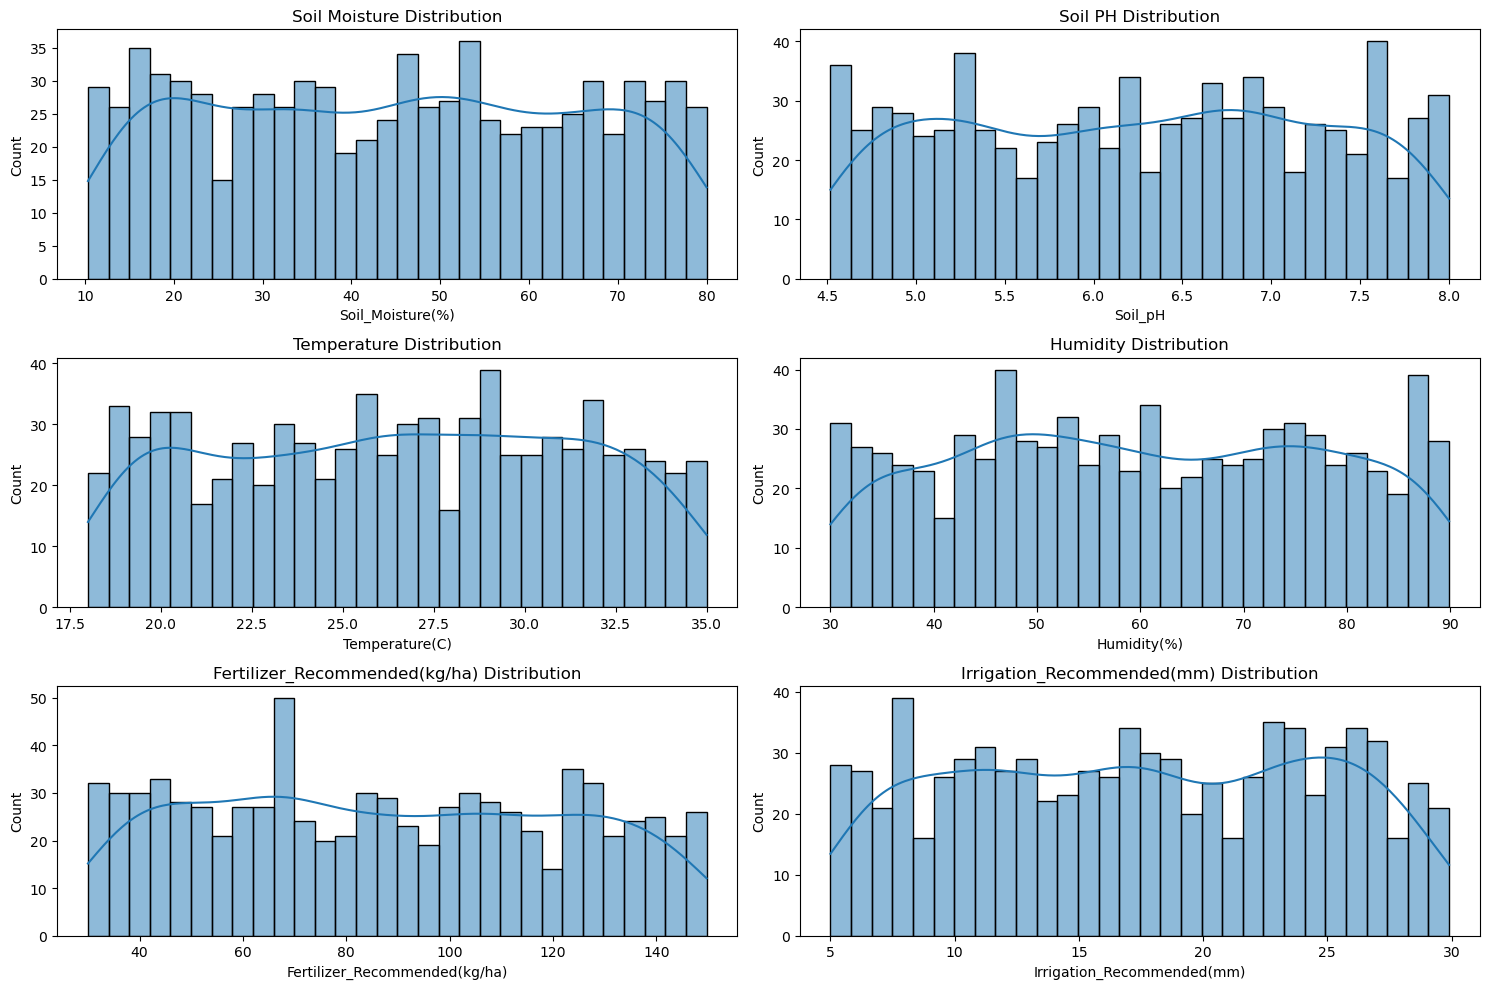

In [9]:
#Visualizing the distribution of numeric variables using histograms
#Setting figure size
plt.figure (figsize=(15,10))
#Histogram for Soil Moisture
plt.subplot(3,2,1)
sns.histplot(df['Soil_Moisture(%)'], bins = 30, kde = True)
plt.title('Soil Moisture Distribution')

#Histogram for Soil PH
plt.subplot(3,2,2)
sns.histplot(df['Soil_pH'], bins = 30, kde = True)
plt.title('Soil PH Distribution')

#Histogram for Temperature
plt.subplot(3,2,3)
sns.histplot(df['Temperature(C)'], bins = 30, kde = True)
plt.title('Temperature Distribution')

#Histogram for Humidity
plt.subplot(3,2,4)
sns.histplot(df['Humidity(%)'], bins = 30, kde = True)
plt.title('Humidity Distribution')

#Histogram for Fertilizer_Recommended(kg/ha)
plt.subplot(3,2,5)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins = 30, kde = True)
plt.title('Fertilizer_Recommended(kg/ha) Distribution')

#Histogram for Irrigation_Recommended(mm)
plt.subplot(3,2,6)
sns.histplot(df['Irrigation_Recommended(mm)'], bins = 30, kde = True)
plt.title('Irrigation_Recommended(mm) Distribution')

plt.tight_layout()


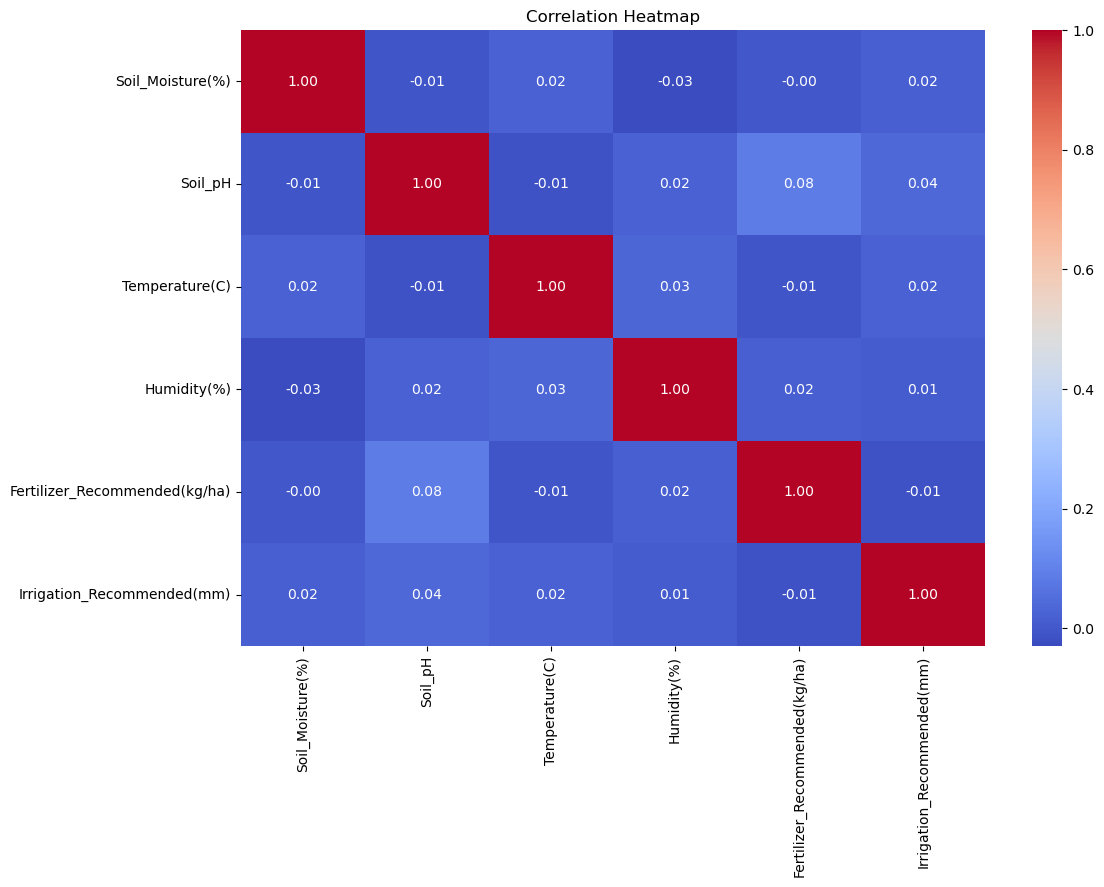

In [10]:
#Creating a corelation heatmap
numeric_df = df.select_dtypes(include= 'number')
plt.figure(figsize = (12,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
corr = df.select_dtypes(include = 'number').corr()
fert_corr = corr ['Fertilizer_Recommended(kg/ha)'].sort_values(ascending = False)
print(fert_corr)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083676
Humidity(%)                      0.015300
Soil_Moisture(%)                -0.002757
Temperature(C)                  -0.007206
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [12]:
avg_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending = False)
print("Crop with highest average soil moisture:", avg_moisture.idxmax())
print(avg_moisture)
print(df['Soil_Moisture(%)'].dtype)

Crop with highest average soil moisture: Wheat
Crop_Type
Wheat       47.181591
Maize       44.950863
Beans       44.391603
Tomatoes    43.815439
Lettuce     42.982078
Name: Soil_Moisture(%), dtype: float64
float64


In [13]:
# Filter crops with average temperature > 30°C and calculate average temp + moisture
hot_crops = df[df['Temperature(C)'] > 30].groupby('Crop_Type').agg({
    'Temperature(C)': 'mean',
    'Soil_Moisture(%)': 'mean'
}).sort_values(by='Temperature(C)', ascending=False)

# Add irrigation adjustment suggestions
def suggest_irrigation(moisture):
    if moisture < 30:
        return "Increase irrigation"
    elif 30 <= moisture <= 50:
        return "Maintain current level"
    else:
        return "Reduce irrigation"

hot_crops['irrigation_adjustment'] = hot_crops['Soil_Moisture(%)'].apply(suggest_irrigation)

print(hot_crops)

           Temperature(C)  Soil_Moisture(%)   irrigation_adjustment
Crop_Type                                                          
Lettuce         32.575676         42.661892  Maintain current level
Wheat           32.528571         42.699714  Maintain current level
Maize           32.430909         44.885091  Maintain current level
Tomatoes        32.404348         48.647391  Maintain current level
Beans           32.311538         46.549038  Maintain current level


In [14]:
df.to_csv('cleaned_precision_agriculture_data.csv', index = False)

In [15]:
print('''
    Insights and Recommendations from Precision Agriculture Data Analysis
    1. Key Factors Influencing Fertilizer Recommendation
        From the correlation analysis, the variables most strongly correlated with Fertilizer_Recommended(kg/ha) are:
            Soil_pH
            Humidity (%)       
            Soil_Moisture(%)
    Recommendation:
        Focus fertilizer recommendations primarily on Soil_pH levels..

    2. Crop with Highest Average Soil Moisture
        Based on grouped means:
            Crop Type: Wheat had the highest average soil moisture among all crops.
    Recommendation:
        Since wheat grows well in water-logged conditions, irrigation practices for wheat fields should continue to maintain higher moisture levels.
''')


    Insights and Recommendations from Precision Agriculture Data Analysis
    1. Key Factors Influencing Fertilizer Recommendation
        From the correlation analysis, the variables most strongly correlated with Fertilizer_Recommended(kg/ha) are:
            Soil_pH
            Humidity (%)       
            Soil_Moisture(%)
    Recommendation:
        Focus fertilizer recommendations primarily on Soil_pH levels..

    2. Crop with Highest Average Soil Moisture
        Based on grouped means:
            Crop Type: Wheat had the highest average soil moisture among all crops.
    Recommendation:
        Since wheat grows well in water-logged conditions, irrigation practices for wheat fields should continue to maintain higher moisture levels.

